In [19]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/jadenadu/Desktop/python/year3 scientific coding/B1-Scientific-Coding/.venv/lib/python3.9/site-packages', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year3 scientific coding', '/Users/jadenadu/Desktop/python/year

# Simulate closed-loop [DO NOT RUN]
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

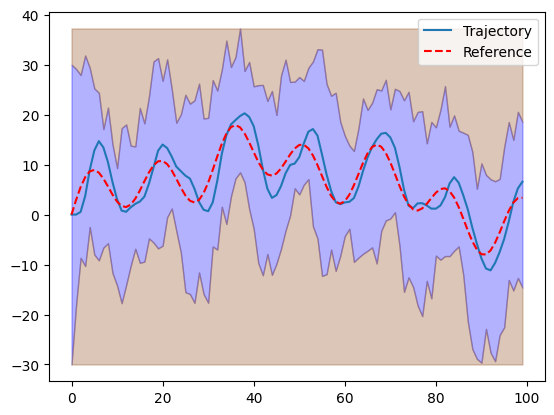

In [16]:
# Import relevant modules
import sys
import os
import numpy as np
sys.path.append(os.path.abspath('..'))
from uuv_mission.control import PDController
from uuv_mission.dynamic import Submarine
from uuv_mission.dynamic import Mission
from uuv_mission.dynamic import ClosedLoop

sub = Submarine()
# Instantiating the  controller
controller = PDController(0.15,0.6)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("data/mission.csv") #implementied method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

# Calculating Metrics to evaluate the controllers performance 

## 1. Settling Time
- Settling time is the time required for the UUV’s depth to remain within a certain percentage (typically ±2% or ±5%) of the target depth after a disturbance or initial change.
- Shorter settling time indicates a responsive controller that can quickly stabilize after a change or disturbance.
- If the settling time is too long, it may suggest that  K_P  is too low, leading to sluggish response. Alternatively, high  K_D  can help reduce oscillations but may slightly increase settling time.

## 2. Overshoot
- Overshoot is the extent to which the UUV’s depth exceeds the target depth initially, typically expressed as a percentage of the target depth.
- Lower overshoot indicates that the controller avoids excessive reaction beyond the target depth.
- High overshoot suggests that  K_P  may be too high, causing the system to aggressively correct errors. In that case, you may need to decrease  K_P  or increase  K_D  to add damping.

## 3. Steady- State Error 
- Steady-state error is the difference between the UUV’s final depth and the target depth after it has stabilized
- Ideally, the steady-state error should be close to zero, showing that the UUV maintains the desired depth without persistent deviation.
- If there’s a steady-state error, it may indicate that  K_P  is too low or the proportional gain isn’t sufficient to reach the target depth accurately.

# Simulating Closed Loop with Performance Metrics

Overshoot: 40.19%
Steady-State Error: 2.99
Settling Time: 100.00 seconds


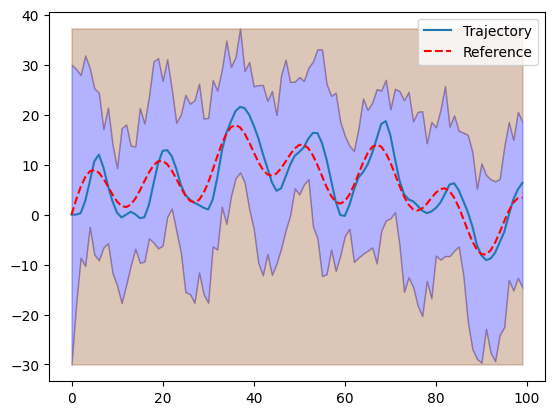

In [21]:
# Import relevant modules
import sys
import os
import numpy as np
sys.path.append(os.path.abspath('..'))
from uuv_mission.control import PDController
from uuv_mission.dynamic import Submarine
from uuv_mission.dynamic import Mission
from uuv_mission.dynamic import ClosedLoop

# Run the closed-loop simulation with disturbances
sub = Submarine()
controller = PDController(0.15, 0.6)  # Assuming these are your chosen Kp and Kd values
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("data/mission.csv")  # Load the mission data

# Run the simulation and calculate performance metrics
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.5)

# Plot the mission and trajectory
trajectory.plot_completed_mission(mission)